# Setup

In [2]:
import os
import sys

root = os.getcwd()
src_path = os.path.join(root, "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

Since there was so much data missing from the datasets, whether it was a row with many NaN (Not a Number) values or a column with the same issue, we thought the best way to solve that was to preprocess the datasets' data. So we came up with the following program, which reads the data first (in data/raw) and then processes them. Then, it inserts the processed data into the data/processed directory, where the trained and tested data are all separated in different files (X_train.csv, X_test.csv, y_train.csv, y_test.csv).

# Preprocessing


In [3]:
from utils.preprocess import preprocess_datasets

preprocess_datasets()

data/processed/class_imbalance:
Processing dataset_1000_hypothyroid.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1002_ipums_la_98-small.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1004_synthetic_control.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1013_analcatdata_challenger.csv...
Classes: [np.int64(0), np.int64(1)] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1014_analcatdata_dmft.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1016_vowel.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1018_ipums_la_99-small.csv...
Classes: ['N', 'P'] → [np.int64(0), np.int64(1)]

data/processed/class_imbalance:
Processing dataset_1020_mfeat-karhunen.csv...
Cla

Unlike the code that inspired our work (zziz/cart), our CART version has more than one class. It has two: one for the tree node (TreeNode) and the other for CART itself (DecisionTree).

# Evaluation

In [5]:
from utils.evaluation import evaluate, save_results

results = evaluate(data_dir="data/processed/class_imbalance/", max_datasets=-1)
save_results(results, "results/class_imbalance/evaluation_data.csv")


Evaluating for dataset: dataset_1000_hypothyroid
Evaluating for dataset: dataset_1002_ipums_la_98-small
Evaluating for dataset: dataset_1004_synthetic_control
Evaluating for dataset: dataset_1013_analcatdata_challenger
Evaluating for dataset: dataset_1014_analcatdata_dmft
Evaluating for dataset: dataset_1016_vowel


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating for dataset: dataset_1018_ipums_la_99-small
Evaluating for dataset: dataset_1020_mfeat-karhunen
Evaluating for dataset: dataset_1021_page-blocks
Evaluating for dataset: dataset_1022_mfeat-pixel
Evaluating for dataset: dataset_1023_soybean
Evaluating for dataset: dataset_1039_hiva_agnostic
Evaluating for dataset: dataset_1045_kc1-top5
Evaluating for dataset: dataset_1049_pc4
Evaluating for dataset: dataset_1050_pc3
Evaluating for dataset: dataset_1056_mc1
Evaluating for dataset: dataset_1059_ar1
Evaluating for dataset: dataset_1061_ar4
Evaluating for dataset: dataset_1064_ar6
Evaluating for dataset: dataset_1065_kc3
Evaluating for dataset: dataset_311_oil_spill
Evaluating for dataset: dataset_312_scene
Evaluating for dataset: dataset_316_yeast_ml8
Evaluating for dataset: dataset_38_sick
Evaluating for dataset: dataset_450_analcatdata_lawsuit
Evaluating for dataset: dataset_463_backache
Evaluating for dataset: dataset_757_meta
Evaluating for dataset: dataset_764_analcatdata_ap

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating for dataset: dataset_875_analcatdata_chlamydia
Evaluating for dataset: dataset_940_water-treatment
Evaluating for dataset: dataset_947_arsenic-male-bladder
Evaluating for dataset: dataset_949_arsenic-female-bladder
Evaluating for dataset: dataset_950_arsenic-female-lung
Evaluating for dataset: dataset_951_arsenic-male-lung
Evaluating for dataset: dataset_954_spectrometer
Evaluating for dataset: dataset_958_segment
Evaluating for dataset: dataset_962_mfeat-morphological
Evaluating for dataset: dataset_966_analcatdata_halloffame
Evaluating for dataset: dataset_968_analcatdata_birthday
Evaluating for dataset: dataset_971_mfeat-fourier
Evaluating for dataset: dataset_976_JapaneseVowels
Evaluating for dataset: dataset_978_mfeat-factors
Evaluating for dataset: dataset_980_optdigits
Evaluating for dataset: dataset_984_analcatdata_draft
Evaluating for dataset: dataset_987_collins
Evaluating for dataset: dataset_995_mfeat-zernike


# Visualization of Results

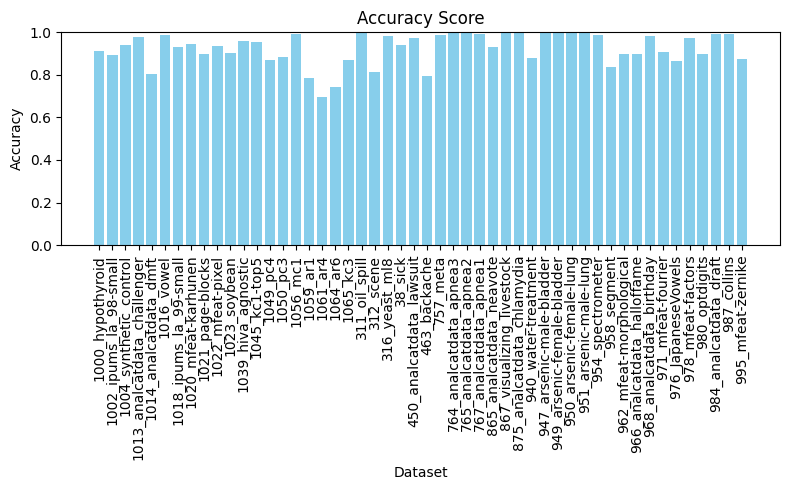

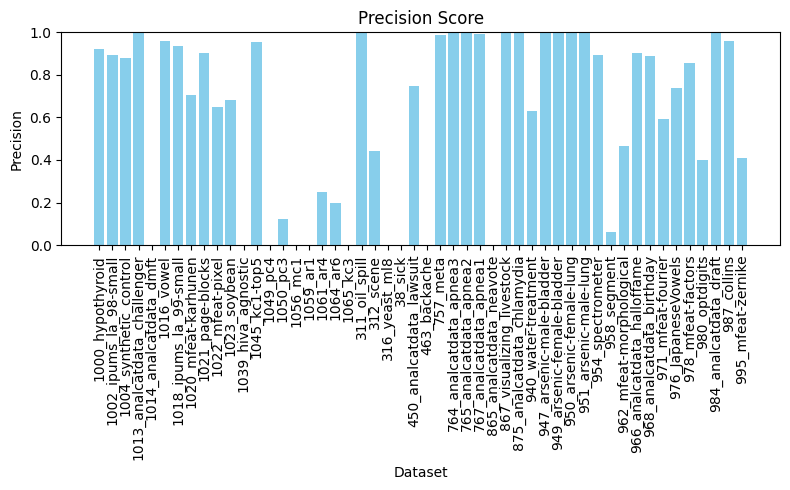

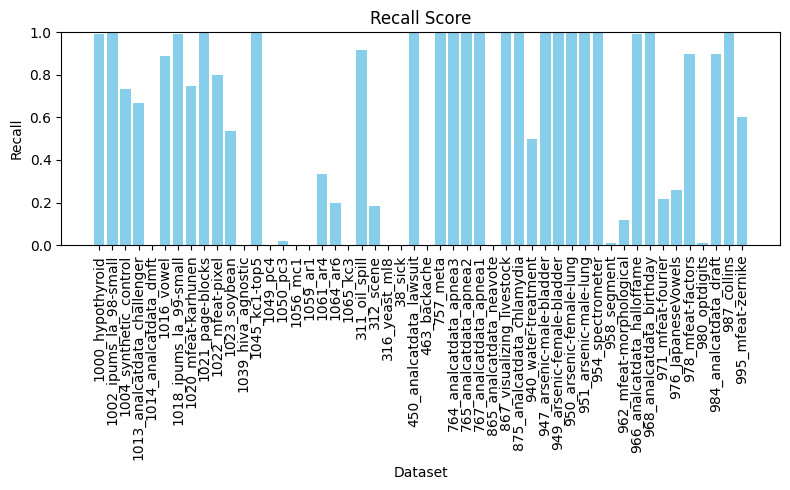

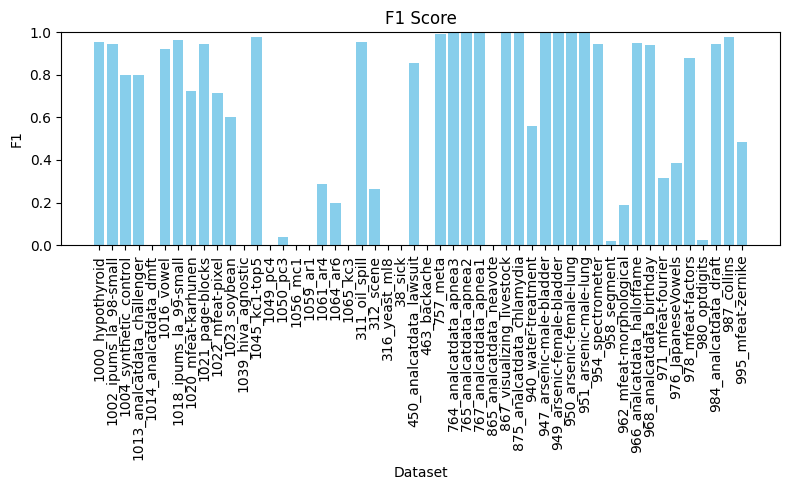

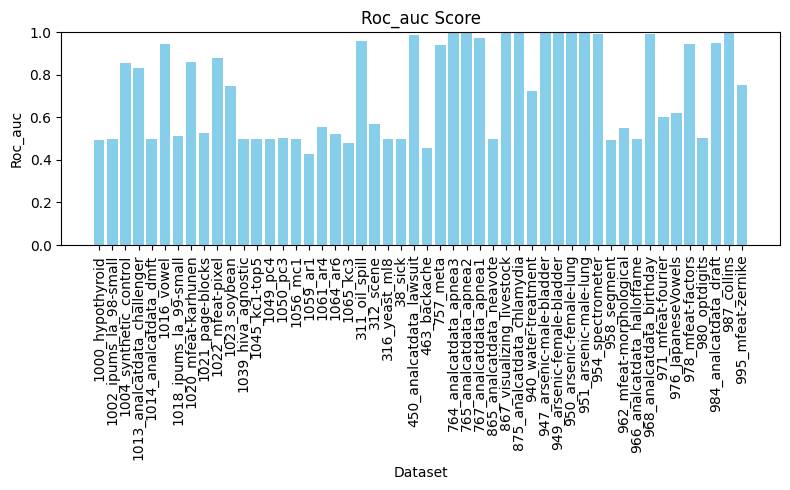

In [6]:
import os
import pandas as pd
from utils.visualization import plot_all_metrics

results_base_path = "results/class_imbalance"
data = pd.read_csv(os.path.join(results_base_path,"evaluation_data.csv"))

plot_all_metrics(data, show=True, save_dir=None)